# question 1

In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)


In [4]:
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)


/home/mca/anaconda3/envs/dse/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [7]:
print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (120, 4), (120, 3)
Validation shape: (15, 4), (15, 3)
Test shape: (15, 4), (15, 3)


In [8]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(X.shape[1],)),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')
])

2025-07-31 10:01:42.589883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-31 10:01:42.815207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-31 10:01:42.820832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    verbose=2)

Epoch 1/50


2025-07-31 10:02:08.655515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2025-07-31 10:02:08.735876: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x767c3116b1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-07-31 10:02:08.735894: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-07-31 10:02:08.769907: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-07-31 10:02:08.814904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2025-07-31 10:02:08.943312: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

8/8 - 1s - loss: 1.4453 - accuracy: 0.3083 - val_loss: 0.9743 - val_accuracy: 0.6667 - 995ms/epoch - 124ms/step
Epoch 2/50
8/8 - 0s - loss: 0.8911 - accuracy: 0.5833 - val_loss: 0.6932 - val_accuracy: 0.8667 - 26ms/epoch - 3ms/step
Epoch 3/50
8/8 - 0s - loss: 0.6367 - accuracy: 0.7583 - val_loss: 0.6120 - val_accuracy: 0.8000 - 26ms/epoch - 3ms/step
Epoch 4/50
8/8 - 0s - loss: 0.5287 - accuracy: 0.7833 - val_loss: 0.4518 - val_accuracy: 0.8667 - 25ms/epoch - 3ms/step
Epoch 5/50
8/8 - 0s - loss: 0.4862 - accuracy: 0.7500 - val_loss: 0.4246 - val_accuracy: 0.8667 - 27ms/epoch - 3ms/step
Epoch 6/50
8/8 - 0s - loss: 0.3504 - accuracy: 0.9167 - val_loss: 0.4840 - val_accuracy: 0.8000 - 26ms/epoch - 3ms/step
Epoch 7/50
8/8 - 0s - loss: 0.3997 - accuracy: 0.8083 - val_loss: 0.3392 - val_accuracy: 0.8667 - 27ms/epoch - 3ms/step
Epoch 8/50
8/8 - 0s - loss: 0.3053 - accuracy: 0.9250 - val_loss: 0.3091 - val_accuracy: 0.9333 - 25ms/epoch - 3ms/step
Epoch 9/50
8/8 - 0s - loss: 0.2604 - accuracy: 0

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9333


# question 2

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [14]:
df = pd.read_csv('bodyfat.csv')

In [15]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [16]:
print(df.columns)

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')


In [17]:
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

In [18]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [21]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [22]:
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [23]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=16,
    verbose=2
)

Epoch 1/100
13/13 - 1s - loss: 329.7560 - mae: 15.3800 - val_loss: 193.2878 - val_mae: 9.3283 - 905ms/epoch - 70ms/step
Epoch 2/100
13/13 - 0s - loss: 102.3169 - mae: 7.7304 - val_loss: 133.6972 - val_mae: 10.4195 - 30ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 69.5773 - mae: 6.8064 - val_loss: 160.9985 - val_mae: 7.2585 - 32ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 39.1495 - mae: 4.8219 - val_loss: 26.2693 - val_mae: 4.3233 - 31ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 21.0947 - mae: 3.6423 - val_loss: 64.0112 - val_mae: 3.6447 - 31ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 9.1907 - mae: 2.3502 - val_loss: 10.4021 - val_mae: 2.7495 - 29ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 29.5972 - mae: 3.8238 - val_loss: 151.7222 - val_mae: 6.0367 - 32ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 53.5696 - mae: 5.8458 - val_loss: 46.7893 - val_mae: 6.2052 - 33ms/epoch - 3ms/step
Epoch 9/100
13/13 - 0s - loss: 24.0070 - mae: 3.8567 - val_loss: 20.800

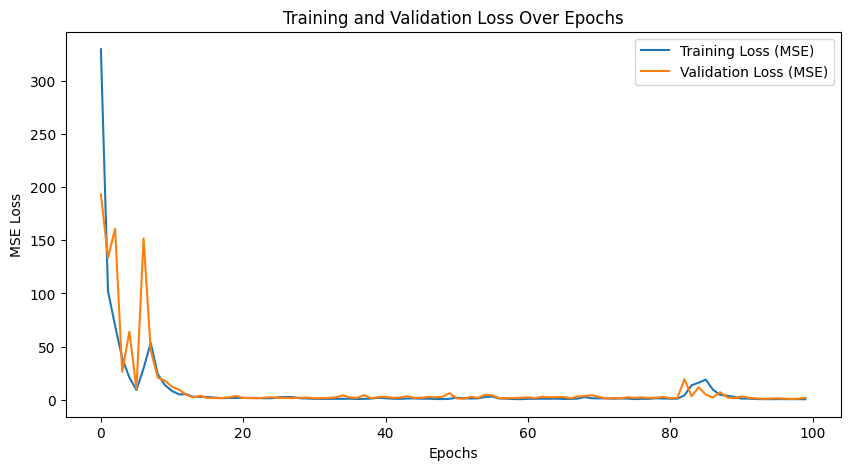

In [24]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


In [25]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test MSE: 0.8761
Test MAE: 0.7449
